In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob  #Library for Text Processing
from bs4 import BeautifulSoup
import re


In [79]:
tweets=pd.read_csv("/home/dheeraj/my_projects/my_project_env/practice/sentiment_analysis/demonetization-tweets.csv",encoding = "ISO-8859-1")
tweets.head()

,Unnamed: 0,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted
0,1,1,RT @rssurjewala: Critical question: Was PayTM ...,False,0,NaN,2016-11-23 18:40:30,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,True,False
1,2,2,RT @Hemant_80: Did you vote on #Demonetization...,False,0,NaN,2016-11-23 18:40:29,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66,True,False
2,3,3,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,0,NaN,2016-11-23 18:40:03,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12,True,False
3,4,4,RT @ANI_news: Gurugram (Haryana): Post office ...,False,0,NaN,2016-11-23 18:39:59,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",deeptiyvd,338,True,False
4,5,5,RT @satishacharya: Reddy Wedding! @mail_today ...,False,0,NaN,2016-11-23 18:39:39,False,NaN,8.014954e+17,NaN,"<a href=""http://cpimharyana.com"" rel=""nofollow...",CPIMBadli,120,True,False


In [80]:
tweets.shape

(14940, 16)

In [99]:
display(tweets.text.head(10))

0    rt rssurjewala critical question paytm informe...
1        rt hemant vote demonetization modi survey app
2    rt roshankar former finsec rbi dy governor cbd...
3    rt ani news gurugram haryana post office emplo...
4    rt satishacharya reddy wedding mail today cart...
5    derekscissors india demonetization blackmoney ...
6    rt gauravcsawant rs lakh looted bank kishtwar ...
7    rt joydeep calling nationalists join walk corr...
8    rt sumitbhati many opposition leaders narendra...
9    national reform destroyed even essence sagan i...
Name: text, dtype: object

In [81]:
TextBlob("not great").sentiment

Sentiment(polarity=-0.4, subjectivity=0.75)

In [82]:
import nltk
nltk.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/dheeraj/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/dheeraj/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [83]:
def clean(x):
    #Remove Html  
    x=BeautifulSoup(x).get_text()
    
    #Remove Non-Letters
    x=re.sub('[^a-zA-Z]',' ',x)
    
    #Convert to lower_case and split
    x=x.lower().split()
    
    #Remove stopwords
    stop=set(stopwords.words('english'))
    words=[w for w in x if not w in stop]
    
    #join the words back into one string
    return(' '.join(words))


In [84]:
tweets['text']=tweets['text'].apply(lambda x:clean(x))

In [101]:
# tweets.head()
display(tweets.text.head(10))

0    rt rssurjewala critical question paytm informe...
1        rt hemant vote demonetization modi survey app
2    rt roshankar former finsec rbi dy governor cbd...
3    rt ani news gurugram haryana post office emplo...
4    rt satishacharya reddy wedding mail today cart...
5    derekscissors india demonetization blackmoney ...
6    rt gauravcsawant rs lakh looted bank kishtwar ...
7    rt joydeep calling nationalists join walk corr...
8    rt sumitbhati many opposition leaders narendra...
9    national reform destroyed even essence sagan i...
Name: text, dtype: object

In [102]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk.corpus import stopwords
from nltk import tokenize

sid = SentimentIntensityAnalyzer()

tweets['sentiment_compound_polarity']=tweets.text.apply(lambda x:sid.polarity_scores(x)['compound'])
tweets['sentiment_neutral']=tweets.text.apply(lambda x:sid.polarity_scores(x)['neu'])
tweets['sentiment_negative']=tweets.text.apply(lambda x:sid.polarity_scores(x)['neg'])
tweets['sentiment_pos']=tweets.text.apply(lambda x:sid.polarity_scores(x)['pos'])
tweets['sentiment_type']=''
tweets.loc[tweets.sentiment_compound_polarity>0,'sentiment_type']='POSITIVE'
tweets.loc[tweets.sentiment_compound_polarity==0,'sentiment_type']='NEUTRAL'
tweets.loc[tweets.sentiment_compound_polarity<0,'sentiment_type']='NEGATIVE'
tweets.head()

,Unnamed: 0,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,...,statusSource,screenName,retweetCount,isRetweet,retweeted,sentiment_compound_polarity,sentiment_neutral,sentiment_negative,sentiment_pos,sentiment_type
0,1,1,rt rssurjewala critical question paytm informe...,False,0,NaN,2016-11-23 18:40:30,False,NaN,8.014957e+17,...,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,True,False,0.1027,0.706,0.135,0.159,POSITIVE
1,2,2,rt hemant vote demonetization modi survey app,False,0,NaN,2016-11-23 18:40:29,False,NaN,8.014957e+17,...,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66,True,False,0.0000,1.000,0.000,0.000,NEUTRAL
2,3,3,rt roshankar former finsec rbi dy governor cbd...,False,0,NaN,2016-11-23 18:40:03,False,NaN,8.014955e+17,...,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12,True,False,0.0000,1.000,0.000,0.000,NEUTRAL
3,4,4,rt ani news gurugram haryana post office emplo...,False,0,NaN,2016-11-23 18:39:59,False,NaN,8.014955e+17,...,"<a href=""http://twitter.com/download/android"" ...",deeptiyvd,338,True,False,0.0000,1.000,0.000,0.000,NEUTRAL
4,5,5,rt satishacharya reddy wedding mail today cart...,False,0,NaN,2016-11-23 18:39:39,False,NaN,8.014954e+17,...,"<a href=""http://cpimharyana.com"" rel=""nofollow...",CPIMBadli,120,True,False,0.0000,1.000,0.000,0.000,NEUTRAL


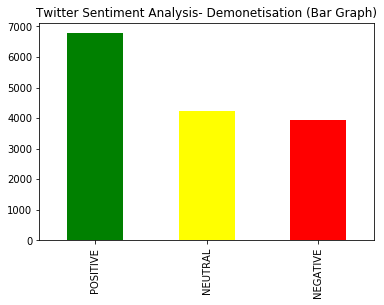

In [110]:
# fig = plt.figure()
# fig.savefig('temp.pdf')
colors = ['green', 'yellow', 'red']

tweets.sentiment_type.value_counts().plot(kind='bar',title="Twitter Sentiment Analysis- Demonetisation (Bar Graph)", color=colors)
plt.savefig('books_read.png')

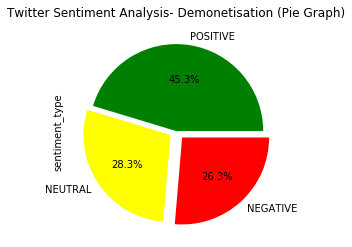

In [111]:
fig = plt.figure()
fig.savefig('temp.pdf')
colors = ['green', 'yellow', 'red']
explode = (0, 0.08, 0.1)
tweets.sentiment_type.value_counts().plot(kind='pie',title="Twitter Sentiment Analysis- Demonetisation (Pie Graph)", colors=colors, explode=explode,autopct='%1.1f%%', shadow=False)
plt.savefig('books_read.png')